# Ch4 Training Linear Models

Equation 4-9

Ridge Regression closed-form solution

$
\mathbf{\hat{\theta}} = \left(X^\mathsf{T} X + \alpha A\right)^{-1} \; X^\mathsf{T} y
$

## Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term) as shown in Eqn. 4-1

Eqn. 4-1 Linear Regression model prediction

$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_n x_n$

where

$\hat{y}$ is the predicted value.

$n$ is the number of features.

$x_i$ is the $i^{th}$ feature value.

$\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1 , \theta_2 , ... , \theta_n$).


This can be written more concisely with the vectorized form

Eqn. 4-2 Linear Regression model predicition (vectorized form)

$\hat{y} = h_{\mathbf{\theta}} (\mathbf{x}) = \mathbf{ \theta \cdot x}$

where

$\mathbf{\theta}$ is the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.

$\mathbf{x}$ is the instance's feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.

$\mathbf{\theta \cdot x}$ is the dot product of the parameter vector and feature vector, which is equal to $\theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_n x_n$

$h_{\theta}$ is the hypothesis function, using the model parameters $\mathbf{\theta}$

To train a Linear Regression model, we need to find the value of $\mathbf{\theta}$ that minimizes the RMSE. 

In practice, it is simpler to minimize the MSE and it leads to the same result.

The MSE of a Linear Regression Hypothesis $h_{\mathbf{\theta}}$ on a training set $\mathbf{X}$ is calculated using Eqn. 4-3

Eqn. 4-3 MSE cost function for a Linear Regression model

$\displaystyle MSE( \mathbf{X} , h_{\mathbf{\theta}} ) = \frac{1}{m} \sum_{i=1}^m \left( \mathbf{\theta^{\mathsf{T}}} \mathbf{x}^{(i)} - y^{(i)} \right)^2$

To simplify notation, we will jut write 

$MSE( \mathbf{\theta} )$

---

I am going to continue by writing my notes by hand, writing them down in LaTeX is far too time consuming.

---

In [150]:
# Setup

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Linear Regression using the Normal Equation

In [151]:
# Let's generate some linear looking data to test the Normal Equation on.
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

The function we are using to generate the data is $y = 4 + 3 x_1 + Gaussian Noise$

Saving figure generated_data_plot


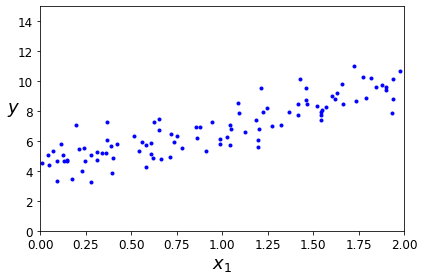

In [152]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]) # x, y axis ranges
save_fig("generated_data_plot")
plt.show()

Now let's compute $\mathbf{\hat{\theta}}$ using the Normal Equation.

In [153]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [154]:
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for $\theta_0 = 4$ and $\theta_1 = 3$ but that's close enough. The noise made it impossible to recover the exact parameters of the original function.

We can now make predictions using $\mathbf{\hat{\theta}}$:

In [155]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure linear_model_predictions_plot


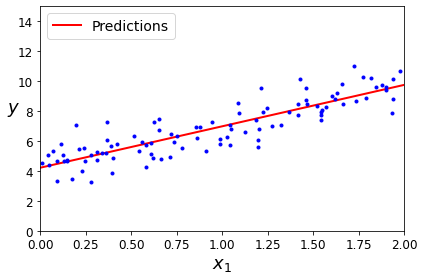

In [156]:
# Let's plot this model's predictions
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

## Linear Regression using Scikit-Learn

In [157]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X, y)
linear_regression.intercept_, linear_regression.coef_

ValueError: illegal value in 4-th argument of internal None

In [158]:
linear_regression.predict(X_new)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [159]:
# We can see these are the same values found by the Normal Equation.

In [160]:
# The LinearRegression class is based on scipy.linalg.lstsq() function which we can call directly:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=13-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [161]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

Note that the pseudoinverse itself is computed using a standard matrix factorization technique called Singlular Value Decomposition (SVD)

See pg. 117

## Linear Regression using Batch Gradient Descent

In [162]:
eta = 0.1 # Learn rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # Random Initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # Gradient vector of the cost function
    theta = theta - eta * gradients # Gradient Descent step

In [163]:
theta

array([[4.21509616],
       [2.77011339]])

In [164]:
# ^ That's the same theta_best that the Normal Equation found

In [165]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [166]:
# ^ Same prediction as the other models

In [167]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descent_plot


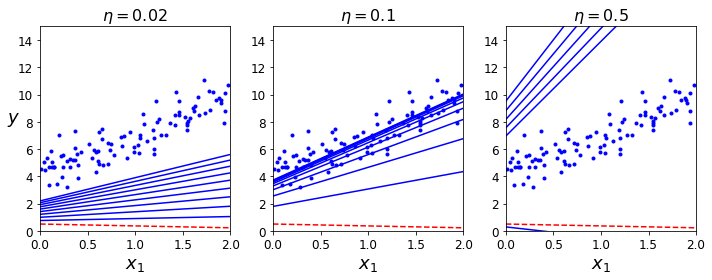

In [168]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

The plots above show the first 10 steps of gradient descent with different learning rates $\eta$

Left plot: eta too low

Right plot: eta too high

Middle plot: looks good

## Stochastic Gradient Descent

In [169]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


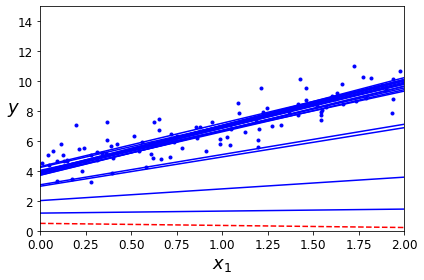

In [170]:
n_epochs = 50
t0, t1 = 5, 50 # Learning Schedule Hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # Random Initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1] # Random X instance
        yi = y[random_index : random_index + 1] # Corresponding random y instance
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show() 

In [171]:
theta

array([[4.21076011],
       [2.74856079]])

In [172]:
# ^ Notice this is slightly different

## Linear Regression using Stochastic Gradient Descent with Scikit-learn

In [173]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_regressor.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [174]:
sgd_regressor.intercept_, sgd_regressor.coef_

(array([4.24365286]), array([2.8250878]))

## Mini-batch Gradient Descent

In [175]:
theta_path_mbgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2, 1) # Random Initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i : i + minibatch_size]
        yi = y_shuffled[i : i + minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mbgd.append(theta)

In [176]:
theta

array([[4.25214635],
       [2.7896408 ]])

## Compare BGD, SGD, and MBGD

In [177]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mbgd = np.array(theta_path_mbgd)

Saving figure gradient_descent_paths_plot


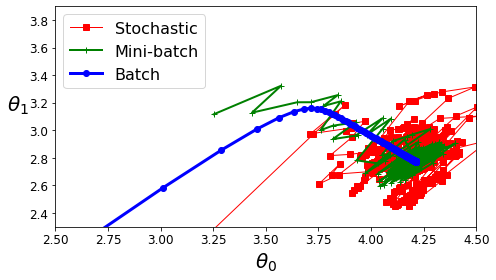

In [178]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mbgd[:, 0], theta_path_mbgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

| Algorithm       	| Large m 	| Out-of-core support 	| Large n 	| Hyperparams 	| Scaling Required 	| Scikit-Learn     	|
|-----------------	|---------	|---------------------	|---------	|-------------	|------------------	|------------------	|
| Normal Equation 	| Fast    	| No                  	| Slow    	| 0           	| No               	| N/A              	|
| SVD             	| Fast    	| No                  	| Slow    	| 0           	| No               	| LinearRegression 	|
| Batch GD        	| Slow    	| No                  	| Fast    	| 2           	| Yes              	| SGDRegressor     	|
| Stochastic GD   	| Fast    	| Yes                 	| Fast    	| ≥2          	| Yes              	| SGDRegressor     	|
| Mini-batch GD   	| Fast    	| Yes                 	| Fast    	| ≥2          	| Yes              	| SGDRegressor     	|


Created using https://www.tablesgenerator.com/markdown_tables#

## Polynomial Regression

In [179]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [180]:
# Generate some nonlinear data based on the quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Saving figure quadratic_data_plot


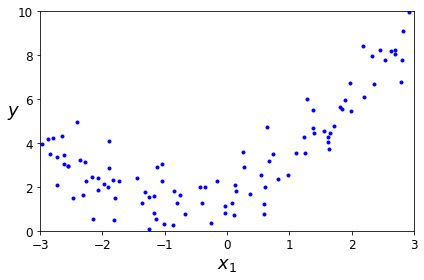

In [181]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [182]:
# Clearly a straight line would never fit this data properly.
# Let's use the PolynomialFeatures class to transform our training data, adding the square (second degree polynomial) of each feature in the trianing set as a new feature.

In [183]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_features.fit_transform(X)

X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [184]:
# X_poly now contains the original feature of X plus the square of this feature.

In [192]:
# Now we can fit a linear regression model to this extended training data
linear_regression = LinearRegression()
linear_regression.fit(X_poly, y)
linear_regression.intercept_, linear_regression.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


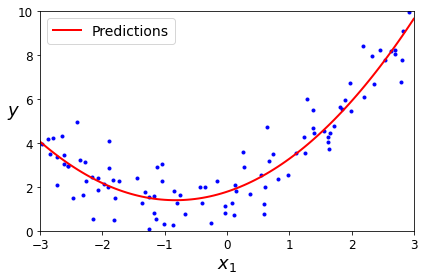

In [193]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = polynomial_features.transform(X_new)
y_new = linear_regression.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

Not bad, the model estimates 

$\hat{y} = 0.56 x_1 ^2 + 0.93x_1 + 1.78$

when the original was

$\hat{y} = 0.5 x_1 ^2 + 1.0x_1 + 2.0 + Gaussian Noise$

Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features which is something plain Linear Regression cannot do.

This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree.

Ex. for two features $a$ and $b$, PolynomialFeatures with degree=3 would add the features

$a^2, a^3, b^2, b^3, ab, a^2 b, ab^2$

Be careful not too add too many or you can drastically increase computation time.

## Learning Curves

In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

ValueError: illegal value in 4-th argument of internal None

In [188]:
# ^ Note sure why this isn't running
# See the graph on pg. 131

This high-degree polynomial regression model is severely overfitting the training data, while the linear model is underfitting it.

How do we device how complex our model should be?

How can we tell if our model is overfitting or underfitting the data?

In chapter 2 we looked at cross-validation to estimate a model's generalization performance.
- If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then the model is overfitting.
- If the performance is poor on both, then it is underfitting.

Another way is to look at the 'Learning Curves'. These are plots of the model's performance on the training set and the validation set as a function of the training set size (or training iteration).

In [189]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


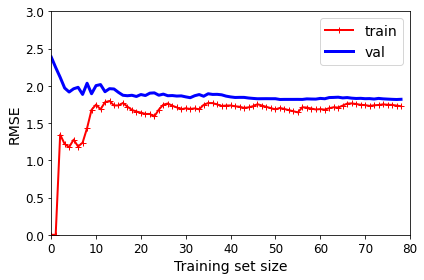

In [190]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()       

This model above is underfitting.

Notice:
- Performance on the training data
    - When there are 1 or 2 instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. 
    - As new instances are added to the training set, it becomes impossible for the model to fit the data perfectly. Both because the data is noisy and non linear. 
    - Thus the training error goes up until it reaches a plateau.
- Performance on the validation data
    - When the model is trained on very few instances it cannot generalize properly, which is why the validation error is initially quite big.
    - As the model is shown more training examples, it learns.
    - Thus the validation error goes down until it reaches a plateau.


Saving figure learning_curves_plot


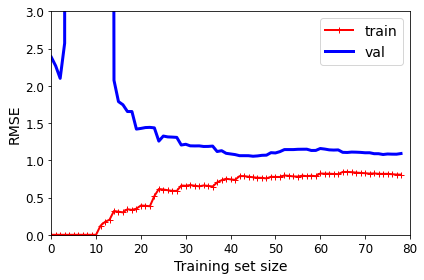

In [196]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()    

This model is overfitting.

Notice:
- The error  on the training data is much lower than with the previous model.
- There is a large gap between the two curves.
    - This means the model performs significantly better on the training data than on the validation data, which is a big indicator that the model is overfitting.

One way to improve an overfitting model is to feed it MORE training data until the validation error reaches the training error.

## The Bias / Variance Trade-off

A model's generalization error can be expressed as the sum of the following three errors:

1. Bias:
    - This is the part of the generalization error that is due to wrong assumptions, such as assuming the data is linear when it is actually quadratic.
    - A high bias model is most likely to underfit the data.

2. Variance:
    - This is due to the model's excessive sensitivity to small variations in the training data.
    - A model with many degrees of freedom (like a high degree polynomial model) is likely to have high variance and thus overfit the training data.

3. Irreducible Error:
    - This is due to the noisiness of the data itself.
    - The only way to reduce this is to clean up the data.

## Regularized Models

A good way to reduce overfitting is to regularize the model.

A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, regularization is typically achieved by constraining the weights of the model.

We will look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

## Ridge Regression

Also called Tikhonov regularization

In [197]:
# Generate some data
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [200]:
# Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution 
# (a variant of Eqn. 4-9)
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [201]:
# Another variant:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [203]:
# Here is how to perform Ridge Regression using Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

# Note that the specifying "l2" as the penalty hyperparameter tells SGD to add a regularization term to the cost function equal to half the square of the l2 norm of the weight vector. This is Ridge Regression.

array([1.47012588])

In [212]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

ValueError: illegal value in 4-th argument of internal None

In [213]:
# ^ Note sure why this isn't working either. See graphs on pg. 136

## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (LASSO Regression)

Just like Ridge Regression, it addes a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm (See Eqn. 4-10)

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (sets them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e. with few nonzero feature weights).

See more important notes on pgs. 139-140

In [219]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

ValueError: illegal value in 4-th argument of internal None

In [ ]:
# ^ Note sure why this isn't working either.

In [217]:
# Here is a small example of using the Lasso class
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

## Elastic Net

Elastic Net is the middle ground between Ridge Regression and Lasso Regression.

The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio 'r'.

- When r = 0, Elastic Net is equivalent to Ridge Regression.
- When r = 1, Elastic Net is equivalent to Lasso Regression.

See Eqn. 4-12 on pg. 140

So when should you use Linear Regression without regularization, Ridge Regression, Lasso Regression, or Elastic Net?

It is always preferable to have some regression, so avoid plain Linear Regression.

Ridge Regression is a good default, but if you suspect only a few features are useful, then you should prefer Lasso Regression or Elastic Net.

In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [220]:
# Here is a short example of Elastic Net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called 'early stopping'

In [221]:
# Generate the data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [224]:
# Early stopping code
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

# Note that with warm_start=True, when the fit() method is called it continues training where it left off instead of restarting from scratch.

Saving figure early_stopping_plot


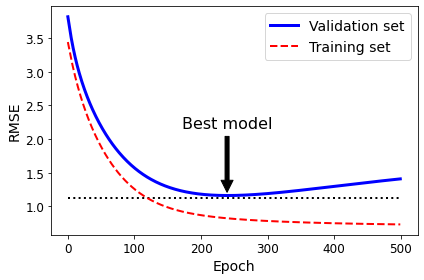

In [225]:
# Create the graph
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

As we can see in the graph, after a while the validation error stops decreasing and starts to go back up.

This indicates that the model has started to overfit the training data.

Note that in reality the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not.
- One solution is to stop only after the validation error has been above a minimum for some time, then roll back the model parameters to the point where the validation error was at a minimum.

In [226]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

## Logistic Regression

Note that there is no know closed-form equation to compute the value of $\mathbf{\theta}$ that minimizes the Logistic Regression Cost Function. But the Cost Function is convex, so Gradient Descent etc. is guaranteed to find the global minimum.
  

Saving figure logistic_function_plot


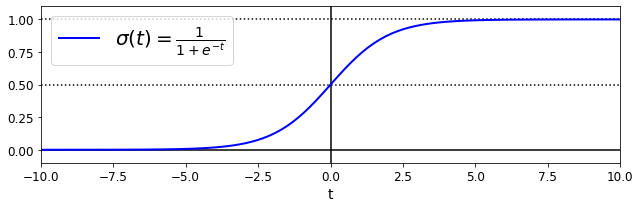

In [227]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

In [228]:
# ^ Logistic Function

## Decision Boundaries

Let's use the iris dataset to illustrate Logistic Regression

In [229]:
# Let's start by building a classifier to detect the 'Iris virginica' type based only on the petal width feature.

In [230]:
# Load the data:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [231]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [232]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [233]:
# Now let's train a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)

LogisticRegression()

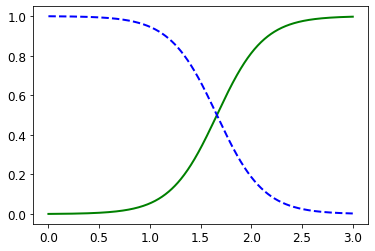

In [235]:
# Now let's look at the model's estimated probabilities for flowers with petal widths varying from 0cm to 3cm.

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = logistic_regression.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

Saving figure logistic_regression_plot


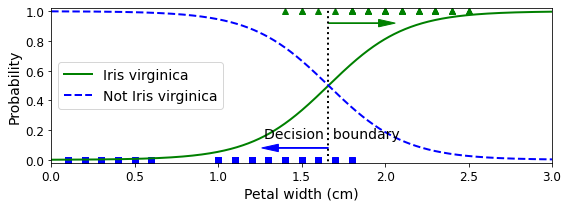

In [237]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = logistic_regression.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [238]:
# Notice that inbetween the classifier is unsure.

decision_boundary # This is where the vertical center line lies.

array([1.66066066])

In [240]:
# If the petal width is larger than 1.6cm, the classifier will predict that the flower is an Iris virginica, and otherwise it will predict that it is not (even if it is not very confident)
logistic_regression.predict([[1.7], [1.5]])

array([1, 0])

In [241]:
# To see the percentages we can call predict_proba
logistic_regression.predict_proba([[1.7], [1.5]])

array([[0.45722097, 0.54277903],
       [0.66709636, 0.33290364]])

Saving figure logistic_regression_contour_plot


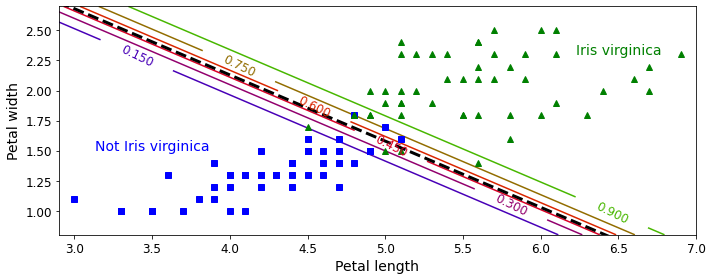

In [242]:
# Now let's perform Logistic Regression using two features (petal length and width)
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

In [244]:
# Note also that just like other models, Logitic Regression models can regularized using l1 or l2 penalties. By default scikit uses l2 for logistic regression.

# The hyperparameter controlling the strength of a scikit logistic regression model is not alpha but it's inverse 'C'. The higher the value of 'C' the less the model is regularized.

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly without having to train and combine multiple binary classifiers.

This is called Softmax Regression, or Multinomial Logistic Regression.

The Softmax Regression classifier predicts only one class at a time (i.e. it is multiclass, not multioutput)

See pg. 148

In [245]:
# Setup the Data
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [246]:
# Train the Softmax Model:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

Saving figure softmax_regression_contour_plot


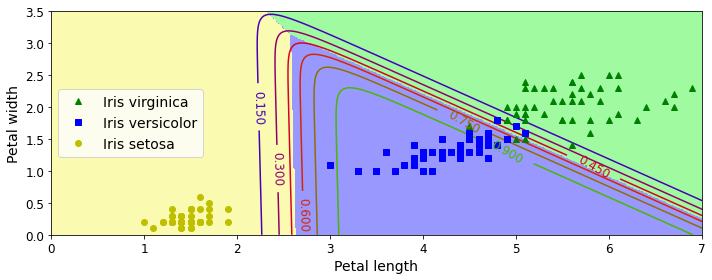

In [247]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [250]:
# ^ Notice that the decision boundaries between any two classes are linear.

# Notice also that the point where all the decision boundaries meet, all classes have an equal estimated probability of 33%.

In [248]:
softmax_reg.predict([[5, 2]])

array([2])

In [249]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Exercises

1. Which Linear Regression training algorithms can you use if you have a training set with millions of features?

2. Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?

3. Can Gradient Descent get suck in a local minimum when training a Logistic Regression model?

4. Do all Gradient Descent algorithms lead to the same model, provided you let them run long enough?

5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

9. Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter alpha or reduce it?

10. Why would you want to use:
    a. Ridge Regression instead of plain Linear Regression (i.e. without any regularization)?
    b. Lasso instead of Ridge Regression?
    c. Elastic Net instead of Lasso?

11. Suppose you want to classify pictures as outdoor / indoor and daytime / nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?